1.https://realpython.com/pandas-merge-join-and-concat/
    
2.https://datacarpentry.org/python-ecology-lesson/05-merging-data/
    
3.https://towardsdatascience.com/practical-uses-of-merge-join-and-concat-8f011bbac241

4.https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

# Combining Datasets: Merge and Join

# Categories of Joins:

- The pd.merge() function implements a number of types of joins: the one-to-one, many-to-one, and many-to-many joins.

- All three types of joins are accessed via an identical call to the pd.merge() interface; the type of join performed depends on the form of the input data. Here we will show simple examples of the three types of merges, and discuss detailed options further below.

# One-to-one joins:

- Perhaps the simplest type of merge expresion is the one-to-one join, which is in many ways very similar to the column-wise concatenation seen in Combining Datasets: Concat & Append. As a concrete example, consider the following two DataFrames which contain information on several employees in a company:

In [ ]:
import pandas as pd
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3=pd.merge(df1,df2)
df3

- The pd.merge() function recognizes that each DataFrame has an "employee" column, and automatically joins using this column as a key. 

- The result of the merge is a new DataFrame that combines the information from the two inputs. Notice that the order of entries in each column is not necessarily maintained: in this case, the order of the "employee" column differs between df1 and df2, and the pd.merge() function correctly accounts for this. 

- Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the left_index and right_index keywords, discussed momentarily).

# Many-to-one joins:

- Many-to-one joins are joins in which one of the two key columns contains duplicate entries. For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate. Consider the following example of a many-to-one join:

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

In [ ]:
df5=pd.merge(df3,df4)
df5

# Many-to-many joins:

- Many-to-many joins are a bit confusing conceptually, but are nevertheless well defined. 

- If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge. 

- This will be perhaps most clear with a concrete example. Consider the following, where we have a DataFrame showing one or more skills associated with a particular group. By performing a many-to-many join, we can recover the skills associated with any individual person:

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
df5

In [ ]:
df6=pd.merge(df4,df5)
df6

In [ ]:
df7=pd.merge(df1,df5)
df7

# Specification of the Merge Key:

- We've already seen the default behavior of pd.merge(): it looks for one or more matching column names between the two inputs, and uses this as the key. However, often the column names will not match so nicely, and pd.merge() provides a variety of options for handling this.

# The on keyword

- Most simply, you can explicitly specify the name of the key column using the on keyword, which takes a column name or a list of column names:

In [ ]:
df8=pd.merge(df1,df2,on="employee")
df8

# The left_on and right_on keywords

- At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as "name" rather than "employee". In this case, we can use the left_on and right_on keywords to specify the two column names:

In [ ]:
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df9

In [ ]:
df1

In [ ]:
df10=pd.merge(df9,df1,left_on='name',right_on='employee')
df10

The result has a redundant column that we can drop if desired–for example, by using the drop() method of DataFrames:

In [ ]:
pd.merge(df9, df1, left_on="name", right_on="employee").drop('name', axis=1)


# The left_index and right_index keywords:

- Sometimes, rather than merging on a column, you would instead like to merge on an index. For example, your data might look like this:

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')

df1a

You can use the index as the key for merging by specifying the left_index and/or right_index flags in pd.merge():

In [ ]:
pd.merge(df1a,df2a,left_index=True,right_index=True)

In [ ]:
df1a.join(df2a)

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])


In [ ]:
df11=pd.merge(df6,df7,how='inner')

In [ ]:
df11

Here we have merged two datasets that have only a single "name" entry in common: Mary. By default, the result contains the intersection of the two sets of inputs; this is what is known as an inner join. We can specify this explicitly using the how keyword, which defaults to "inner":

Other options for the how keyword are 'outer', 'left', and 'right'. An outer join returns a join over the union of the input columns, and fills in all missing values with NAs:

In [ ]:
df12=pd.merge(df6,df7,how='outer')
df12

In [ ]:
df13=pd.merge(df6,df7,how='left')
df13

In [ ]:
df14=pd.merge(df6,df7,how='right')
df14

In [1]:
import pandas as pd
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

In [2]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [3]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [4]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


# Rank US states and territories by their 2010 population density

In [5]:
df=pd.merge(pop,abbrevs,left_on='state/region',right_on='abbreviation',how='outer')

In [6]:
df

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL
...,...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN,NaN
2540,USA,under18,2011,73902222.0,NaN,NaN
2541,USA,total,2011,311582564.0,NaN,NaN
2542,USA,under18,2012,73708179.0,NaN,NaN


In [7]:
df.drop(columns=('abbreviation'),axis=1,inplace=True)

In [8]:
df

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama
...,...,...,...,...,...
2539,USA,total,2010,309326295.0,NaN
2540,USA,under18,2011,73902222.0,NaN
2541,USA,total,2011,311582564.0,NaN
2542,USA,under18,2012,73708179.0,NaN


In [9]:
df.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [10]:
df[df['population'].isnull()]

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN
2453,PR,under18,1993,NaN,NaN
2454,PR,under18,1992,NaN,NaN
2455,PR,total,1992,NaN,NaN
2456,PR,under18,1994,NaN,NaN
2457,PR,total,1994,NaN,NaN


It appears that all the null population values are from Puerto Rico prior to the year 2000; this is likely due to this data not being available from the original source.

More importantly, we see also that some of the new state entries are also null, which means that there was no corresponding entry in the abbrevs key! Let's figure out which regions lack this match:

In [11]:
df.loc[df['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [12]:
df.loc[df['state/region'] == 'PR', 'state'] = 'Puerto Rico'
df.loc[df['state/region'] == 'USA', 'state'] = 'United States'
df.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [13]:
final = pd.merge(df, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [14]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [15]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

We see that our areas DataFrame does not contain the area of the United States as a whole. We could insert the appropriate value (using the sum of all state areas, for instance), but in this case we'll just drop the null values because the population density of the entire United States is not relevant to our current discussion:

In [16]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [17]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [18]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [19]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

- concat() when we were trying to add multiple data blocks with the same structure and put them in one data frame one below the other.

- In order to add column data to existing entries, we have used merge(). The data was added based on the same values for columns on which were merging data frames.

- Join() was a special case of merge() when at least one of the entries we are joining on was the index.

# Concatenating DataFrames

- `concat function in pandas to append either columns or rows from one DataFrame to another

- When we concatenate DataFrames, we need to specify the axis. axis=0 tells pandas to stack the second DataFrame UNDER the first one. It will automatically detect whether the column names are the same and will stack accordingly. axis=1 will stack the columns in the second DataFrame to the RIGHT of the first DataFrame. To stack the data vertically, we need to make sure we have the same columns and associated column format in both datasets. When we stack horizontally, we want to make sure what we are doing makes sense (i.e. the data are related in some way).

# Inner joins

- The most common type of join is called an inner join. An inner join combines two DataFrames based on a join key and returns a new DataFrame that contains only those rows that have matching values in both of the original DataFrames.

- Inner joins yield a DataFrame that contains only rows where the value being joined exists in BOTH tables. An example of an inner join, adapted from Jeff Atwood’s blogpost about SQL joins is below:

# Left joins

- Like an inner join, a left join uses join keys to combine two DataFrames. Unlike an inner join, a left join will return all of the rows from the left DataFrame, even those rows whose join key(s) do not have values in the right DataFrame. Rows in the left DataFrame that are missing values for the join key(s) in the right DataFrame will simply have null (i.e., NaN or None) values for those columns in the resulting joined DataFrame.

- Note: a left join will still discard rows from the right DataFrame that do not have values for the join key(s) in the left DataFrame.

# Other join types

The pandas merge function supports two other join types:

Right (outer) join: Invoked by passing how='right' as an argument. Similar to a left join, except all rows from the right DataFrame are kept, while rows from the left DataFrame without matching join key(s) values are discarded.
Full (outer) join: Invoked by passing how='outer' as an argument. This join type returns the all pairwise combinations of rows from both DataFrames; i.e., the result DataFrame will NaN where data is missing in one of the dataframes. This join type is very rarely used.

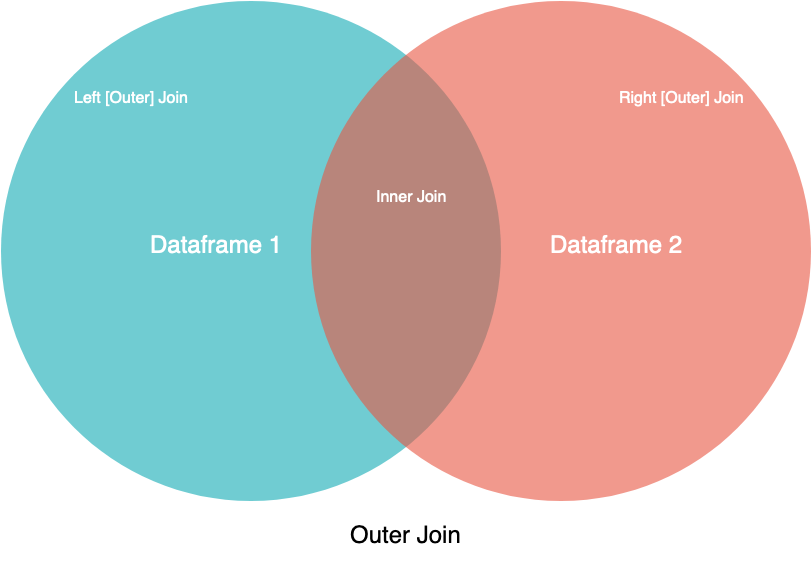

# FOR PRACTISE:

- https://realpython.com/pandas-merge-join-and-concat/